In [3]:
import pandas as pd 

In [4]:
#loading dataset
df = pd.read_csv('Data/mental_health_analysis.csv')
df

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,Moderate,Average
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,Moderate,Excellent
4997,4998,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,High,Good
4998,4999,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,High,Average


In [5]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Social_Media_Hours', 'Exercise_Hours',
       'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score',
       'Wearable_Stress_Score', 'Support_System', 'Academic_Performance'],
      dtype='object')

# 
Cleaning data

In [6]:
#only getting the ['Age', 'Survey_Stress_Score', 'Screen_Time_Hours'] coloumn 
new_df = df[['Age', 'Survey_Stress_Score', 'Screen_Time_Hours', 'User_ID']]

In [7]:
new_df

,Age,Survey_Stress_Score,Screen_Time_Hours,User_ID
0,16,3,8.158189,1
1,17,5,5.151993,2
2,15,2,9.209325,3
3,17,5,9.823658,4
4,17,5,11.338990,5
...,...,...,...,...
4995,14,1,5.922202,4996
4996,15,4,10.224924,4997
4997,14,4,4.059322,4998
4998,18,2,10.657076,4999


In [8]:
new_df['Screen_Time_Hours']= new_df['Screen_Time_Hours'].astype('int64')

/var/folders/vw/pm30yvwx2j16k5b7q2hm828c0000gn/T/ipykernel_71228/2485562956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Screen_Time_Hours']= new_df['Screen_Time_Hours'].astype('int64')


In [9]:
new_df

,Age,Survey_Stress_Score,Screen_Time_Hours,User_ID
0,16,3,8,1
1,17,5,5,2
2,15,2,9,3
3,17,5,9,4
4,17,5,11,5
...,...,...,...,...
4995,14,1,5,4996
4996,15,4,10,4997
4997,14,4,4,4998
4998,18,2,10,4999


In [10]:
#checking for missing values
new_df.isnull().sum()

Age                    0
Survey_Stress_Score    0
Screen_Time_Hours      0
User_ID                0
dtype: int64

In [11]:
#checking for duplicates 
new_df.duplicated().sum()

0

In [12]:
#Count how many duplicate values exist in the User_ID column
new_df['User_ID'].duplicated().sum()

0

In [13]:
# droping user_Id column
new_df = new_df.drop("User_ID", axis=1)

In [14]:
new_df

,Age,Survey_Stress_Score,Screen_Time_Hours
0,16,3,8
1,17,5,5
2,15,2,9
3,17,5,9
4,17,5,11
...,...,...,...
4995,14,1,5
4996,15,4,10
4997,14,4,4
4998,18,2,10


In [15]:
new_df.dtypes


Age                    int64
Survey_Stress_Score    int64
Screen_Time_Hours      int64
dtype: object

In [16]:
#checking for outliers 
#checking if there is score greater than the range
(new_df["Survey_Stress_Score"] >5).any() == False


True

In [17]:
# savind the clean data in data folder 
new_df.to_csv('Data/cleaned_mental_health_data.csv', index=False)



# Visualization

In [18]:
# importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Screen Time vs Stress Score

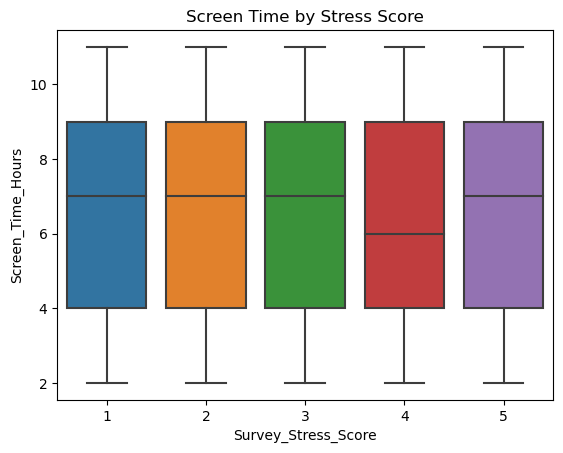

In [52]:
#box plot screen time and stress score

sns.boxplot(
    x="Survey_Stress_Score",
    y="Screen_Time_Hours",
    data=new_df
)
#lables
plt.title("Screen Time by Stress Score")
#saving image
plt.savefig("Figures/boxplot_stress_vs_screen_time.png")

In [ ]:
avg_screentime = new_df.groupby("Age")["Screen_Time_Hours"].mean().reset_index()

In [33]:
# min and max of age 
new_df["Age"].min()

13

In [34]:
#max of age
new_df["Age"].max()

18

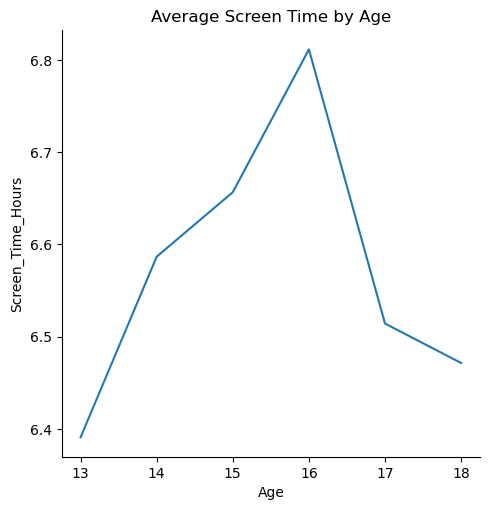

In [55]:
# age vs screen time
avg_screentime = new_df.groupby("Age")["Screen_Time_Hours"].mean().reset_index()
sns.relplot(
    x="Age",
    y= "Screen_Time_Hours",
    data = avg_screentime,
    kind = 'line'
)
#labels
plt.title("Average Screen Time by Age")
#saving image
plt.savefig("Figures/lineplot_Average_Screen Time_vs_age.png")

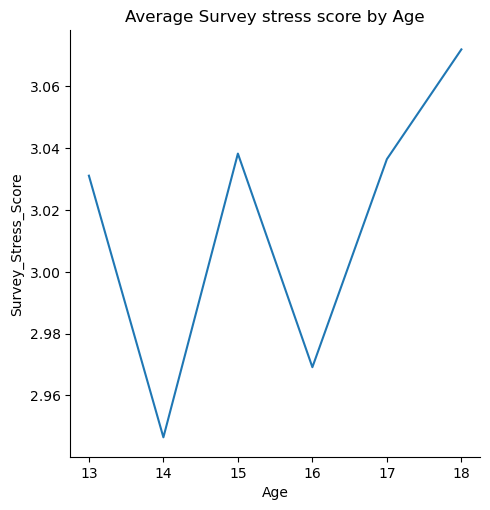

In [58]:
# Group the data by Age and calculating the average stress score
avg_stress = new_df.groupby("Age")["Survey_Stress_Score"].mean().reset_index()

# Now plot it as a line graph
sns.relplot(
    x="Age",
    y="Survey_Stress_Score",
    data=avg_stress,
    kind='line'
)
#label
plt.title("Average Survey stress score by Age")
#saving image
plt.savefig("Figures/lineplot_Average_Survey_stress_score by Age.png")

In [23]:
# print averages
print(new_df.mean())
# print averages for specific columns
print("Average Age:", new_df['Age'].mean())
print("Average Stress Score:", new_df['Survey_Stress_Score'].mean())
print("Average Screen Time:", new_df['Screen_Time_Hours'].mean())

Age                    15.4932
Survey_Stress_Score     3.0158
Screen_Time_Hours       6.5704
dtype: float64
Average Age: 15.4932
Average Stress Score: 3.0158
Average Screen Time: 6.5704
